### Import packages

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import joblib

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

### Import data and understand data

In [2]:
df = pd.read_csv('passwords.csv')
df.head(5)

,password,strength
0,yrtzuab476,1
1,yEdnN9jc1NgzkkBP,2
2,sarita99,1
3,Suramerica2015,2
4,PPRbMvDIxMQ19TMo,2


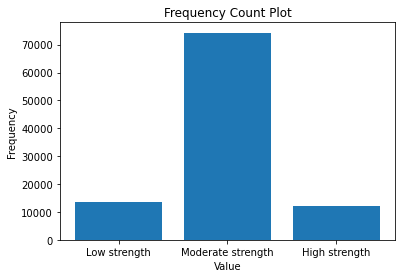

In [3]:
value_counts = df['strength'].value_counts().sort_index()

plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Frequency Count Plot')
plt.xticks([0, 1, 2], ['Low strength', 'Moderate strength', 'High strength'])
plt.show()

### Train test validation data split

In [4]:
X = df["password"]
y = df["strength"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Model comparison and champion model selection

In [5]:
models = {
    'Logistic regression': make_pipeline(TfidfVectorizer(), LogisticRegression()),
    'Multinomial Naive Bayes': make_pipeline(TfidfVectorizer(), MultinomialNB()),
    'Linear SVC': make_pipeline(TfidfVectorizer(), LinearSVC(dual=False))
}

results = {'Model': [], 'Accuracy': [], 'F1 Score': []}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    results['Model'].append(model_name)
    results['Accuracy'].append(accuracy)
    results['F1 Score'].append(f1)


In [6]:
results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,F1 Score
0,Logistic regression,0.747000,0.641249
1,Multinomial Naive Bayes,0.746800,0.640011
2,Linear SVC,0.747767,0.644424


### Export model

In [7]:
model = make_pipeline(TfidfVectorizer(), LinearSVC(dual=False))
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Linear SVC Accuracy: {accuracy * 100:.2f}%\nLinear SVC F1: {f1:.4f}')

Linear SVC Accuracy: 74.78%
Linear SVC F1: 0.6444


In [8]:
joblib.dump(model, 'model.bin')

['model.bin']

In [14]:
# New password for prediction
new_password = ["appledasg1293"]

# Use the same vectorizer instance used during training
vectorizer = model.named_steps['tfidfvectorizer']
new_password_transformed = vectorizer.transform(new_password)

# Convert the sparse matrix to a dense array
new_password_transformed_dense = new_password_transformed.toarray()

# Make prediction
prediction = model.predict(new_password_transformed_dense.reshape(1, -1))

print(f'Predicted strength for "appledasg1293": {prediction[0]}')

AttributeError: 'numpy.ndarray' object has no attribute 'lower'

In [20]:
# New password for prediction
new_password = ["appledasg1293"]

# Create a DataFrame for the new password
new_password_df = pd.DataFrame({'password': new_password})

new_password_df

,password
0,appledasg1293


In [22]:
# Make prediction
prediction = model.predict(new_password)

print(f'Predicted strength for "appledasg1293": {prediction[0]}')

Predicted strength for "appledasg1293": 1
